In [99]:
import numpy as np
import pandas as pd
import datetime
# Source/run information
save_dir = "/data/ATCA/analysis/"
data_dir = "/data/ATCA/ATCA_datareduction/"
target = "J020507"
epoch = "2021-10-15"
band = "X"
timeranges = np.array(["17:02:30","17:03:30",
                       "17:04:30","17:05:30",
                       "17:06:30","17:07:30",
                       "17:08:30","17:09:30",
                       "17:10:30",
                       "18:46:30",
                       "18:47:30",
                       "18:49:30","18:50:30",
                       "18:51:30","18:52:30",
                       "18:54:30",
                       "18:55:30"
                      ])


In [57]:
j020507_xtimes = []
for times in timeranges:
    df = pd.read_csv(f"{data_dir}/{target}/{target}_{epoch}_{band}_{times}+00:00:30.csv")
    j020507_xtimes.append(np.squeeze(df["# S_Cband"]))

print(j020507_xtimes)

[0.3240644824978821, 0.322958636807067, 0.32318095905784966, 0.3246635938337876, 0.32392223537454246, 0.32349711976318474, 0.3247944653105872, 0.3236152765978205, 0.3236718300270247, 0.3192114400394974, 0.31894401640281167, 0.31972295451514393, 0.3169493799815257, 0.319268398173467, 0.3184485823407892, 0.31900653805997964, 0.31944089173383494]


In [72]:
date_time_obj_test = datetime.datetime.strptime(timeranges[0], "%H:%M:%S")
print(date_time_obj_test)

date_time_extra = (date_time_obj_test + datetime.timedelta(0,30)).time()
print(date_time_extra)

timest_test = date_time_extra.strftime("%H:%M:%S")
print(timest_test)

1900-01-01 17:02:30
17:03:00
17:03:00


In [59]:
plt_dates = []

for i in range(len(timeranges)):
    plt_dates.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

print(plt_dates)

[datetime.datetime(2021, 10, 15, 17, 2, 30), datetime.datetime(2021, 10, 15, 17, 3, 30), datetime.datetime(2021, 10, 15, 17, 4, 30), datetime.datetime(2021, 10, 15, 17, 5, 30), datetime.datetime(2021, 10, 15, 17, 6, 30), datetime.datetime(2021, 10, 15, 17, 7, 30), datetime.datetime(2021, 10, 15, 17, 8, 30), datetime.datetime(2021, 10, 15, 17, 9, 30), datetime.datetime(2021, 10, 15, 17, 10, 30), datetime.datetime(2021, 10, 15, 18, 46, 30), datetime.datetime(2021, 10, 15, 18, 47, 30), datetime.datetime(2021, 10, 15, 18, 49, 30), datetime.datetime(2021, 10, 15, 18, 50, 30), datetime.datetime(2021, 10, 15, 18, 51, 30), datetime.datetime(2021, 10, 15, 18, 52, 30), datetime.datetime(2021, 10, 15, 18, 54, 30), datetime.datetime(2021, 10, 15, 18, 55, 30)]


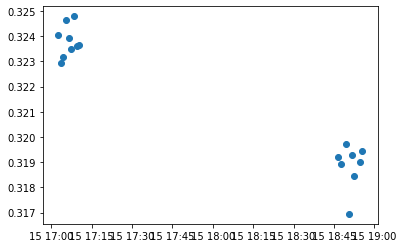

In [60]:
import matplotlib.pyplot as plt 

plt.plot_date(plt_dates, j020507_xtimes)

In [103]:
start_str = "17:01:50"
end_str = "17:11:09"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges = []
timeranges.append(start_str)
while new_time <= end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)


start_str = "18:46:10"
end_str = "18:55:30"

start_time = datetime.datetime.strptime(start_str, "%H:%M:%S") 
end_time = datetime.datetime.strptime(end_str, "%H:%M:%S") 
new_time = start_time
current_time = start_time
timeranges.append(start_str)
while new_time <= end_time: 
    new_time = (new_time + datetime.timedelta(0,30))
    current_time = new_time.time()
    current_str = new_time.strftime("%H:%M:%S")
    timeranges.append(current_str)
print(timeranges)

['17:01:50', '17:02:20', '17:02:50', '17:03:20', '17:03:50', '17:04:20', '17:04:50', '17:05:20', '17:05:50', '17:06:20', '17:06:50', '17:07:20', '17:07:50', '17:08:20', '17:08:50', '17:09:20', '17:09:50', '17:10:20', '17:10:50', '17:11:20']
['17:01:50', '17:02:20', '17:02:50', '17:03:20', '17:03:50', '17:04:20', '17:04:50', '17:05:20', '17:05:50', '17:06:20', '17:06:50', '17:07:20', '17:07:50', '17:08:20', '17:08:50', '17:09:20', '17:09:50', '17:10:20', '17:10:50', '17:11:20', '18:46:10', '18:46:40', '18:47:10', '18:47:40', '18:48:10', '18:48:40', '18:49:10', '18:49:40', '18:50:10', '18:50:40', '18:51:10', '18:51:40', '18:52:10', '18:52:40', '18:53:10', '18:53:40', '18:54:10', '18:54:40', '18:55:10', '18:55:40']


In [130]:
from casatasks import (
    flagmanager,
    flagdata,
    mstransform,
    listobs,
    setjy,
    gaincal,
    bandpass,
    fluxscale,
    applycal,
    tclean,
    rmtables,
    impbcor,
    split,
    uvmodelfit,
    exportfits,
)
import os
from casacore.tables import table

save_dir = "/data/ATCA/analysis/"
data_dir = "/data/ATCA/ATCA_datareduction/"
target = "J020507"
epoch = "2021-10-15"
band = "C"


# mstransform(
#     vis=f"{data_dir}data/{epoch}_{band}_{target}.ms",
#     outputvis=f"{data_dir}data/{epoch}_{band}_{target}_time.ms",
#     datacolumn="corrected",
#     nspw=1,
#     regridms=True,
#     field=target,
#     combinespws=True
# )
tar_ms = f"{data_dir}data/{epoch}_{band}_{target}_time.ms"

j020507_fluxes = []

outfile = f"{data_dir}/{target}/casa_files/{target}_{band}_{epoch}.cl"
if (os.path.exists(outfile))is False: 
    uvmodelfit(
        vis=tar_ms,
        niter=10,
        comptype='P',
        outfile=outfile,
        field="0",
        selectdata=True,
        timerange="",
    )
    tbl = table(outfile)
    flux = tbl.getcell("Flux", 0)[0].astype("float64")
    j020507 = flux
else:
    tbl = table(outfile)
    flux = tbl.getcell("Flux", 0)[0].astype("float64")
    j020507 = flux

print(j020507)
    
for i in range(len(timeranges)):
    timerange = f"{timeranges[i]}+00:00:30"
    outfile = f"{data_dir}/{target}/casa_files/{target}_{band}_{epoch}_{timerange}.cl"
    if (os.path.exists(outfile))is False: 
        uvmodelfit(
            vis=tar_ms,
            niter=10,
            comptype='P',
    #         spw="0",
    #         sourcepar=[0.3, 2.6, 0.7],
            outfile=outfile,
            field="0",
            selectdata=True,
            timerange=timerange,
        )
        tbl = table(outfile)
        flux = tbl.getcell("Flux", 0)[0].astype("float64")
        j020507_fluxes.append(flux)
    else:
        tbl = table(outfile)
        flux = tbl.getcell("Flux", 0)[0].astype("float64")
        j020507_fluxes.append(flux)

j020507_fluxes_C = j020507_fluxes
print(j020507_fluxes_C)

Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J020507_C_2021-10-15.cl: 20 columns, 1 rows
0.2913687541502073
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J020507_C_2021-10-15_17:01:50+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J020507_C_2021-10-15_17:02:20+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J020507_C_2021-10-15_17:02:50+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J020507_C_2021-10-15_17:03:20+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of default-locked table /data/ATCA/ATCA_datareduction//J020507/casa_files/J020507_C_2021-10-15_17:03:50+00:00:30.cl: 20 columns, 1 rows
Successful readonly open of defau

/home/katross/.local/lib/python3.6/site-packages/ipykernel_launcher.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
/home/katross/.local/lib/python3.6/site-packages/ipykernel_launcher.py:82: ComplexWarning: Casting complex values to real discards the imaginary part


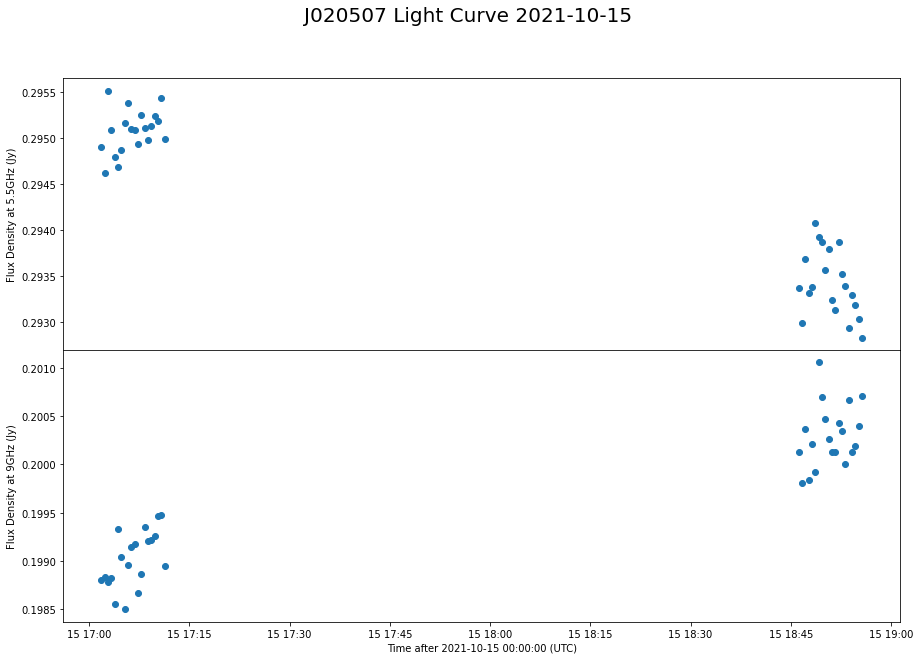

In [144]:
fig = plt.figure(1, figsize=(15,10),facecolor='white')
gs = fig.add_gridspec(2,hspace=0)
axes = gs.subplots(sharex=True)
fig.suptitle("J020507 Light Curve 2021-10-15", fontsize=20)
axes[0].plot_date(plt_dates, j020507_fluxes_C)
axes[1].plot_date(plt_dates, j020507_fluxes_X)
axes[0].set_ylabel("Flux Density at 5.5GHz (Jy)")
axes[1].set_ylabel("Flux Density at 9GHz (Jy)")
axes[1].set_xlabel("Time after 2021-10-15 00:00:00 (UTC)")
plt.savefig("/data/ATCA/analysis/J020507_2021-10-15-lightcurve.png",facecolor=fig.get_facecolor(),transparent=False)
# plt.plot_date(plt_dates, j020507_fluxes_C)
# plt.title("J020507 C band Oct21")

[datetime.datetime(2021, 10, 15, 17, 1, 50), datetime.datetime(2021, 10, 15, 17, 2, 20), datetime.datetime(2021, 10, 15, 17, 2, 50), datetime.datetime(2021, 10, 15, 17, 3, 20), datetime.datetime(2021, 10, 15, 17, 3, 50), datetime.datetime(2021, 10, 15, 17, 4, 20), datetime.datetime(2021, 10, 15, 17, 4, 50), datetime.datetime(2021, 10, 15, 17, 5, 20), datetime.datetime(2021, 10, 15, 17, 5, 50), datetime.datetime(2021, 10, 15, 17, 6, 20), datetime.datetime(2021, 10, 15, 17, 6, 50), datetime.datetime(2021, 10, 15, 17, 7, 20), datetime.datetime(2021, 10, 15, 17, 7, 50), datetime.datetime(2021, 10, 15, 17, 8, 20), datetime.datetime(2021, 10, 15, 17, 8, 50), datetime.datetime(2021, 10, 15, 17, 9, 20), datetime.datetime(2021, 10, 15, 17, 9, 50), datetime.datetime(2021, 10, 15, 17, 10, 20), datetime.datetime(2021, 10, 15, 17, 10, 50), datetime.datetime(2021, 10, 15, 17, 11, 20), datetime.datetime(2021, 10, 15, 18, 46, 10), datetime.datetime(2021, 10, 15, 18, 46, 40), datetime.datetime(2021, 10

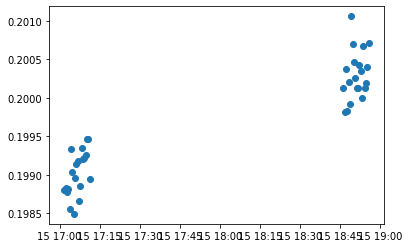

In [131]:
plt_dates = []

for i in range(len(timeranges)):
    plt_dates.append(datetime.datetime.strptime(f"{epoch} {timeranges[i]}", "%Y-%m-%d %H:%M:%S"))

print(plt_dates)
import matplotlib.pyplot as plt 
print(j020507_X)
plt.plot_date(plt_dates, j020507_fluxes_X)